# Exercise 4 Neural Network Learning

In [1]:
%matplotlib inline

from numpy import (c_, r_, mean, sqrt, floor, ceil, ones, newaxis,
                   arange, zeros, ones, array, log, finfo, float64, exp, size, sum, sin,
                   mod)
from numpy.random import permutation, rand
from scipy.optimize import minimize
from scipy.io import loadmat
from matplotlib.pyplot import show, imshow, axis

In [2]:
def sigmoid(z):
    return 1 / (1 + exp(-z))

def sigmoidGradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    theta1 = nn_params[0:(hidden_layer_size * (input_layer_size + 1))] \
        .reshape(hidden_layer_size, input_layer_size + 1)

    theta2 = nn_params[theta1.size:] \
        .reshape(num_labels, hidden_layer_size + 1)
        
    m, n = X.shape
    theta1_grad = zeros(size(theta1))
    theta2_grad = zeros(size(theta2))

    a1 = c_[ones((m, 1)), X]
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    a2 = c_[ones((m, 1)), a2]
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    h_x = a3

    Y = zeros((m, num_labels))
    for i in range(m):
        Y[i, y[i] - 1] = 1

    J = mean(sum((- Y * log(h_x) - (1 - Y) * log(1 - h_x)), 1)) \
        + lambda_ / (2 * m) * (sum(sum(theta1[:, 1:] ** 2, 1)) + sum(sum(theta2[:, 1:] ** 2, 1)))

    epsilon3 = a3 - Y
    epsilon2 = epsilon3.dot(theta2)[:, 1:] * sigmoidGradient(z2)

    epsilon1 = epsilon2.T.dot(a1)
    epsilon2 = epsilon3.T.dot(a2)

    theta1_grad = epsilon1 / m
    theta1_grad[:, 1:] = theta1_grad[:, 1:] + lambda_ / m * theta1[:, 1:]
    theta2_grad = epsilon2 / m
    theta2_grad[:, 1:] = theta2_grad[:, 1:] + lambda_ / m * theta2[:, 1:]

    grad = r_[theta1_grad.flatten(), theta2_grad.flatten()]

    return J, grad

In [3]:
def display_data(X, example_width=None):
    m, n = X.shape
    if not example_width:
      # assume the example is a square image
      example_width = round(sqrt(n))

    # Compute rows, cols
    example_height = int((n / example_width))
    example_width = int(example_width)

    # Compute number of items to display
    display_rows = int(floor(sqrt(m)))
    display_cols = int(ceil(m / display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - ones((pad + display_rows * (example_height + pad),
                            pad + display_cols * (example_width + pad)))

    base_rows = arange(example_height)
    base_cols = arange(example_width)

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex, :]))

            #print X[curr_ex, :].reshape(example_height, example_width) / max_val
            rows = pad + base_rows[:, newaxis] + j * (pad + example_height)
            cols = pad + base_cols + i * (pad + example_width)
            display_array[rows, cols] = X[curr_ex, :]\
              .reshape(example_height, example_width) / max_val
            curr_ex += 1

    imgplot = imshow(display_array.T)
    # Gray Image
    imgplot.set_cmap('gray')
    axis('off')

# Machine Learning Online Class - Exercise 4 Neural Network Learning

In [4]:
# 20x20 Input Images of Digits
input_layer_size = 400
# 25 hidden units
hidden_layer_size = 25
# 10 labels, from 1 to 10   
# (note that we have mapped "0" to label 10)
num_labels = 10

 ## Loading and Visualizing Data ...

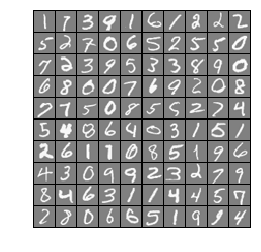

In [5]:
data1 = loadmat('ex4data1.mat');
X = data1['X']
y = data1['y']

m, n = X.shape

# Randomly select 100 data points to display
rand_indices = permutation(m)
sel = X[rand_indices[:100], :]

display_data(sel)
show(block=False)

# Part 2: Loading Parameters

Loading Saved Neural Network Parameters ...

In [6]:
weights = loadmat('ex4weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']

# Unroll parameters 
nn_params = r_[theta1.flatten() , theta2.flatten()]

# Part 3: Compute Cost (Feedforward)

Feedforward Using Neural Network ...

In [7]:
# Weight regularization parameter (we set this to 0 here).
lambda_ = 0

J, _ = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

print('''Cost at parameters (loaded from ex4weights): {:.6}
(this value should be about 0.287629)'''.format(J))

Cost at parameters (loaded from ex4weights): 0.287629
(this value should be about 0.287629)


# Part 4: Implement Regularization

In [8]:
# Weight regularization parameter (we set this to 1 here).

lambda_ = 1

J, _ = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_);

print(f'''Cost at parameters (loaded from ex4weights): {J:.7}
(this value should be about 0.383770)''')

Cost at parameters (loaded from ex4weights): 0.3837699
(this value should be about 0.383770)


# Part 5: Sigmoid Gradient

Evaluating sigmoid gradient...

In [9]:
g = sigmoidGradient(array([1, -0.5, 0, 0.5, 1]))
print(f'Sigmoid gradient evaluated at [1 -0.5 0 0.5 1]: {g}')

Sigmoid gradient evaluated at [1 -0.5 0 0.5 1]: [0.19661193 0.23500371 0.25       0.23500371 0.19661193]


# Part 6: Initializing Pameters

Initializing Neural Network Parameters ...

In [10]:
def rand_initialize_weights(L_in, L_out):
    e = 0.12
    return rand(L_out, L_in) * 2 * e - e

In [11]:
initial_theta1 = rand_initialize_weights(input_layer_size + 1, hidden_layer_size)
initial_theta2 = rand_initialize_weights(hidden_layer_size + 1, num_labels)

# Part 7: Implement Backpropagation

In [12]:
# Checking Backpropagation...

def debug_initialize_weights(fan_out, fan_in):
    return sin(arange(fan_out * (1 + fan_in))).reshape(fan_out, 1 + fan_in) / 10

def compute_numerical_gradient(J, theta):
    e = 1e-4
    numgrad = zeros(theta.shape, dtype='float')
    perturb = zeros(theta.shape, dtype='float')
    for p in range(theta.size):
        perturb[p] = e
        loss1, _ = J(theta - perturb)
        loss2, _ = J(theta + perturb)
        numgrad[p] = (loss2 - loss1) / (2 * e)
        perturb[p]= 0
        
    return numgrad

def check_nn_gradients(lambda_ = None):
    lambda_ = lambda_ if lambda_ is not None else 0
    
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    # We generate some 'random' test data
    theta1 = debug_initialize_weights(hidden_layer_size, input_layer_size);
    theta2 = debug_initialize_weights(num_labels, hidden_layer_size);
    # Reusing debugInitializeWeights to generate X
    X  = debug_initialize_weights(m, input_layer_size - 1)
    y  = 1 + mod(arange(m), num_labels).T
    
    nn_params = r_[theta1.flatten(), theta2.flatten()]
    
    def cost_func(p):
        return nn_cost_function(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_) 
    
    J, grad = cost_func(nn_params)
    numgrad = compute_numerical_gradient(cost_func, nn_params)
    print(c_[numgrad, grad])

In [13]:
check_nn_gradients()
# the numbers in the 2 columns should look similar

[[ 6.90654083e-03  6.90654084e-03]
 [-1.10852709e-04 -1.10852710e-04]
 [ 1.43851837e-04  1.43851834e-04]
 [ 2.66299665e-04  2.66299665e-04]
 [ 1.21251043e-02  1.21251043e-02]
 [-4.29822000e-05 -4.29822018e-05]
 [ 1.51666186e-04  1.51666187e-04]
 [ 2.06873381e-04  2.06873383e-04]
 [ 6.19847901e-03  6.19847902e-03]
 [ 6.41872688e-05  6.41872658e-05]
 [ 2.03012229e-05  2.03012235e-05]
 [-4.22496704e-05 -4.22496701e-05]
 [-5.42355683e-03 -5.42355683e-03]
 [ 1.12549716e-04  1.12549718e-04]
 [-1.30018476e-04 -1.30018475e-04]
 [-2.53048280e-04 -2.53048282e-04]
 [-1.20761029e-02 -1.20761029e-02]
 [ 5.72000558e-05  5.72000571e-05]
 [-1.60500355e-04 -1.60500356e-04]
 [-2.30637482e-04 -2.30637482e-04]
 [ 1.02286353e-01  1.02286353e-01]
 [ 5.09594910e-02  5.09594910e-02]
 [ 4.96506204e-02  4.96506204e-02]
 [ 5.32772700e-02  5.32772700e-02]
 [ 4.98448914e-02  4.98448914e-02]
 [ 5.07054723e-02  5.07054723e-02]
 [ 9.95931723e-02  9.95931723e-02]
 [ 5.02316727e-02  5.02316727e-02]
 [ 4.78387283e-02  4

# Part 8: Implement Regularization

Checking Backpropagation (w/ Regularization) ...

In [14]:
lambda_ = 3
check_nn_gradients(lambda_)

# Also output the costFunction debugging values
debug_J, _  = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_);

print(f'''Cost at (fixed) debugging parameters (w/ lambda = 3): {debug_J}
(this value should be about 0.576051)''')


[[ 0.00690654  0.00690654]
 [ 0.05037741  0.05037741]
 [ 0.0547017   0.0547017 ]
 [ 0.0087335   0.0087335 ]
 [ 0.0121251   0.0121251 ]
 [-0.05757844 -0.05757844]
 [-0.01661326 -0.01661326]
 [ 0.03962607  0.03962607]
 [ 0.00619848  0.00619848]
 [ 0.0247913   0.0247913 ]
 [-0.03262097 -0.03262097]
 [-0.06004166 -0.06004166]
 [-0.00542356 -0.00542356]
 [ 0.02532257  0.02532257]
 [ 0.05930642  0.05930642]
 [ 0.03876422  0.03876422]
 [-0.0120761  -0.0120761 ]
 [-0.05762665 -0.05762665]
 [-0.04521974 -0.04521974]
 [ 0.008762    0.008762  ]
 [ 0.10228635  0.10228635]
 [ 0.10144775  0.10144775]
 [ 0.10420847  0.10420847]
 [ 0.06174447  0.06174447]
 [ 0.00443674  0.00443674]
 [-0.00682998 -0.00682998]
 [ 0.09959317  0.09959317]
 [ 0.08965087  0.08965087]
 [ 0.10720022  0.10720022]
 [ 0.07664811  0.07664811]
 [ 0.01633527  0.01633527]
 [-0.01125638 -0.01125638]
 [ 0.29693242  0.29693242]
 [ 0.17354254  0.17354254]
 [ 0.20209208  0.20209208]
 [ 0.19520993  0.19520993]
 [ 0.1268967   0.1268967 ]
 

# Part 8: Training NN

Training Neural Network...

In [15]:
lambda_ = .1
initial_nn_param = r_[initial_theta1.flatten(), initial_theta2.flatten()]

result = minimize(nn_cost_function,
                  initial_nn_param,
                  args=(input_layer_size, hidden_layer_size, num_labels, X, y, lambda_),
                  method='CG',
                  jac=True,
                  options=dict(maxiter=50))

theta = result.x

theta1 = theta[0:(hidden_layer_size * (input_layer_size + 1))] \
    .reshape(hidden_layer_size, input_layer_size + 1)

theta2 = theta[theta1.size:] \
    .reshape(num_labels, hidden_layer_size + 1)

# Part 9: Visualize Weights

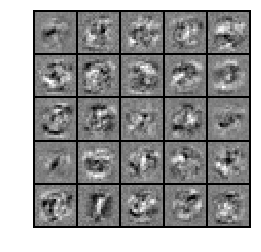

In [16]:
# Visualizing Neural Network... 
display_data(theta1[:, 1:])

# Part 10: Implement Predict

In [17]:
def predict(theta1, theta2, X):
    m, n = X.shape
    num_labels = theta2.shape[0]
    
    h1 = sigmoid(c_[ones((m, 1)), X].dot(theta1.T))
    h2 = sigmoid(c_[ones((m, 1)), h1].dot(theta2.T))
    p = h2.argmax(1) + 1
    
    return p

pred = predict(theta1, theta2, X)

print(f'''Training Set Accuracy: {mean(pred == y.flatten()) * 100}''')

Training Set Accuracy: 97.2
